In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's build a brain
model = Sequential()

# First, we'll add a layer that looks at small parts of the picture
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Then, we'll add a layer that picks the most important parts
model.add(MaxPooling2D(pool_size=(2, 2)))

# We'll add another layer to look at the important parts more closely
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# And another layer to pick the most important parts again
model.add(MaxPooling2D(pool_size=(2, 2)))

# Now, we'll flatten the picture into a long line
model.add(Flatten())

# We'll add a layer to think about the line and make a guess
model.add(Dense(128, activation='relu'))

# Finally, we'll make a final guess about the number
model.add(Dense(10, activation='softmax'))

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Conv2D (Convolutional Layer):
Imagine you have a picture (like a photo of a cat). Now, you want to find certain things in the picture, like ears, eyes, or whiskers. A Conv2D layer is like a little "window" that slides over the picture, looking for things like edges and shapes. Each time the window slides over a part of the picture, it tries to find a little part of the cat, like an ear or an eye.

# MaxPooling2D (Pooling Layer):
After the Conv2D layer finds important parts like ears or eyes, we don’t need all the little details anymore. So, the MaxPooling2D layer helps by shrinking the picture a little and keeping only the most important parts, like the biggest shapes. It’s like looking at a picture through a small window and saying, "What’s the biggest thing in this part?" and remembering that.

In [3]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9107 - loss: 0.2902
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9862 - loss: 0.0466
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9904 - loss: 0.0298
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9935 - loss: 0.0199
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9955 - loss: 0.0139
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9964 - loss: 0.0101
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9967 - loss: 0.0097
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9970 - loss: 0.0075
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9980 - loss: 0.0061
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9974 - loss: 0.0081


In [5]:
img_path = r"C:\Users\LENOVO\Desktop\Skilligence AI-ML\new task\DataSets\DataSets\5.jpg"
img = tf.keras.utils.load_img(img_path, color_mode="grayscale", target_size=(28, 28))
img_array = tf.keras.utils.img_to_array(img)
# img_array = 255 - img_array  # Invert colors if needed
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [6]:
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Predicted digit: 2


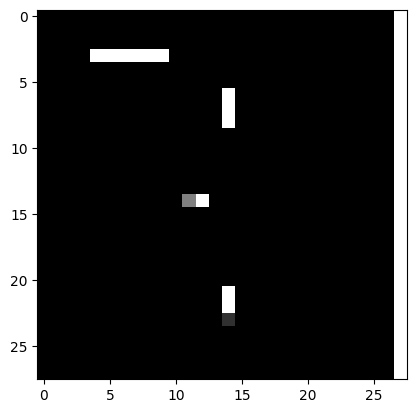

In [7]:
print("Predicted digit:", predicted_digit)
plt.imshow(img_array[0], cmap='gray')
plt.show()